# Clustering

## Importing Needed packages

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from jupyter_datatables import init_datatables_mode
%matplotlib inline
%reload_ext jupyter_require
%requirejs d3 https://d3js.org/d3.v5.min

### Init Data Tables

In [54]:
init_datatables_mode()

## Load Data From CSV File

In [55]:
df = pd.read_csv("Customer.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data Exploration

In [56]:
# summarize the data
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Data pre-processing

In [57]:
gender = {"Gender":{'Female': 1,'Male': 0}}
df.replace(gender , inplace = True)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


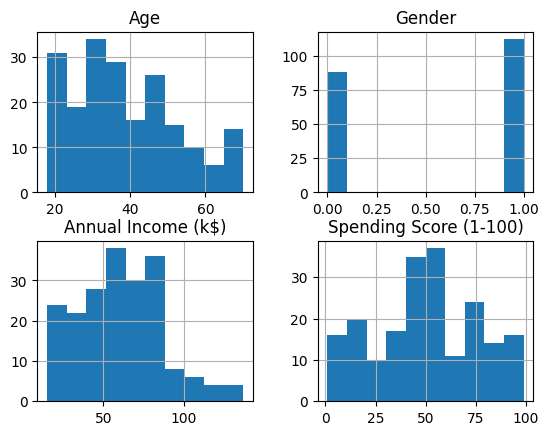

In [58]:
cdf = df[['Age','Gender','Annual Income (k$)','Spending Score (1-100)']]
viz = cdf
viz.hist()
plt.show()